<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 3 </div>
<div style="text-align: right"> <font color='Gray'> Sebastián Pulgares </div>


***

### Modelo de Deffuant
Se establecen N agentes, cada agente tiene asignado un valor entre 0 y 1, los agentes interactúan comparando este valor, si la resta entre el valor delagente a y el agente b es menor a un umbral definido, estos cambian su opinión acercandose al centro entre los 2.
### Simulacion
...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from tqdm import trange

In [54]:
def model(N, steps, dt, E, U, nombre):
    start=time.time()
    path = './Simulacion/'+ str(nombre)+'/'
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
    with open(path+'/log.txt', 'w') as file: ##Archivo que guardará los parámetros usados
        file.write( 'El numero de agentes es: '+str(N)+'\n')
        file.write('El paso temporal se definió como '+str(dt)+' emparejamientos'+'\n')
        file.write('Se consideraron '+str(steps)+' pasos temporales'+'\n')
        file.write('El umbral utilizado fue: '+str(E)+'\n')
        file.write('El parámetro de convergencia utilizado fue: '+str(U)+'\n')
    Agents = np.zeros([N, steps])
    Agents[:, 0] = np.random.uniform(0, 1, size=N)
    for i in trange(1,steps):
        Agents[:,i]=Agents[:,i-1]
        for ii in range(dt):
            a,b=np.random.randint(N),np.random.randint(N)
            if np.abs(Agents[:,i-1][a]-Agents[:,i-1][b])<E:
                Agents[:,i][a]=Agents[:,i-1][a]+U*(Agents[:,i-1][b]-Agents[:,i-1][a])
                Agents[:,i][b]=Agents[:,i-1][b]+U*(Agents[:,i-1][a]-Agents[:,i-1][b])
        times = np.full(Agents.shape[0], i) 
        values = Agents[:, i] 
        plt.plot(times, values, 'bo', markersize=2, alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Value vs Time')
    plt.grid(True)
    plt.savefig(path+'Fig.png')
    plt.show()
    end=time.time()
    with open(path+'/log.txt', 'a') as file:
        file.write("Esta simulación se demoró : "+str(end-start)+ " segundos")
    print("El tiempo total de demora es "+str(end-start)+ " segundos")

100%|██████████| 49999/49999 [01:23<00:00, 601.59it/s]


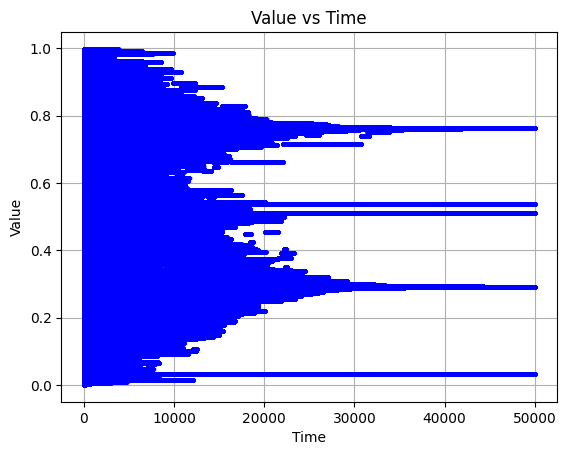

El tiempo total de demora es 377.1723484992981 segundos


In [56]:
model(1000,50000,1, 0.2,0.5, 'Fig6')